# Exploratory Data Analysis: Financial Fraud Dataset

This notebook performs exploratory analysis on the Ontario Financial Fraud dataset.

We aim to:
- Understand the distribution of fraud types.
- Identify the most common point of fraud detection.
- Analyze how many fraud cases are preventable and when they are detected.
- Justify our project’s focus on **Payment Fraud** and **Transaction Initiation Stage** based on data.

In [18]:
# TODO: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Notebook settings
sns.set(style='whitegrid')

In [19]:
# TODO: Load the financial fraud dataset
df = pd.read_csv('./data/synthetic_fraud_ontario_v3.csv')  # Adjust filename as needed
df.head()

,fraud_id,fraud_type,location,date_reported,amount_loss,reported_by,age,channel,is_preventable,fraud_detected_at,risk_score
0,FRAUD-7175939,Online Shopping,Ontario,2024-11-17,8960.23,victim,63,phone,True,Completion,0.83
1,FRAUD-1524015,Online Shopping,Ontario,2024-05-30,5976.91,employer,67,email,False,Initiation,0.32
2,FRAUD-3188916,Identity Fraud,Ontario,2024-09-11,7603.57,victim,78,in-person,True,Initiation,0.28
3,FRAUD-8208822,Online Shopping,Ontario,2024-10-07,704.07,employer,18,in-person,False,Completion,0.24
4,FRAUD-6415375,Online Shopping,Ontario,2025-03-13,7580.56,police,51,in-person,True,Initiation,0.32


## Data Cleaning

In [29]:
# ✅ Section 2: Data Cleaning
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# Drop duplicates if any
df.drop_duplicates(inplace=True)


Missing Values:
 fraud_id             0
fraud_type           0
location             0
date_reported        0
amount_loss          0
reported_by          0
age                  0
channel              0
is_preventable       0
fraud_detected_at    0
risk_score           0
dtype: int64
Number of duplicate rows: 0


## Data Transformation

In [30]:
# ✅ Section 3: Data Transformation
# Convert date column to datetime
df['date_reported'] = pd.to_datetime(df['date_reported'])

# Create a new column for fraud year
df['fraud_year'] = df['date_reported'].dt.year

## Data Summarization

In [32]:
# ✅ Section 5: Data Summarization
summary_stats = df[['amount_loss', 'age', 'risk_score']].describe()
print(summary_stats)

# Highlight total cases from Step 1
total_fraud_cases = len(df)
ideal_cases = 7334
gap = total_fraud_cases - ideal_cases
print(f"Total Fraud Cases: {total_fraud_cases} — Reduction Target: {gap} cases")


        amount_loss           age    risk_score
count  43680.000000  43680.000000  43680.000000
mean    5247.372847     51.512408      0.500625
std     2742.054493     19.587817      0.231155
min      500.190000     18.000000      0.100000
25%     2862.052500     35.000000      0.300000
50%     5257.965000     52.000000      0.500000
75%     7610.485000     68.000000      0.700000
max     9999.830000     85.000000      0.900000
Total Fraud Cases: 43680 — Reduction Target: 36346 cases


## Correlation Analysis

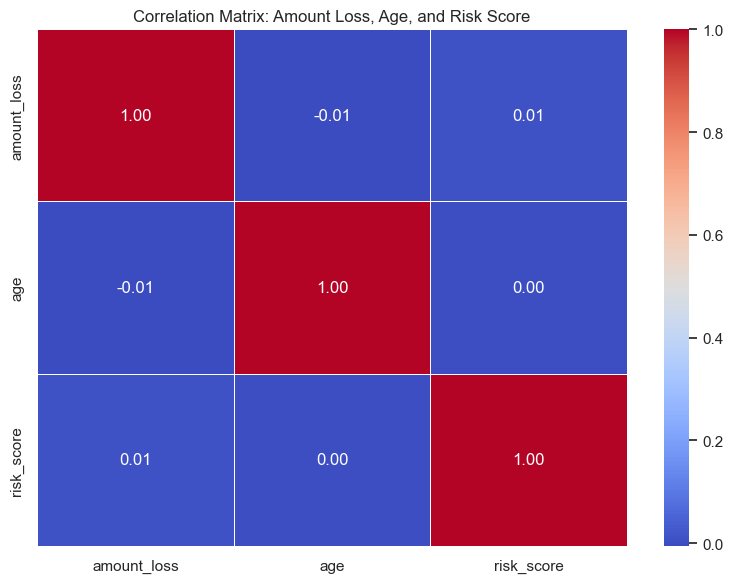

In [33]:
# 📌 Correlation Analysis - Heatmap of Numerical Variables

import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns for correlation
numeric_cols = ['amount_loss', 'age', 'risk_score']
correlation_matrix = df[numeric_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Amount Loss, Age, and Risk Score')
plt.tight_layout()
plt.show()


## Data Visualisation


## Fraud Type Frequency Distribution

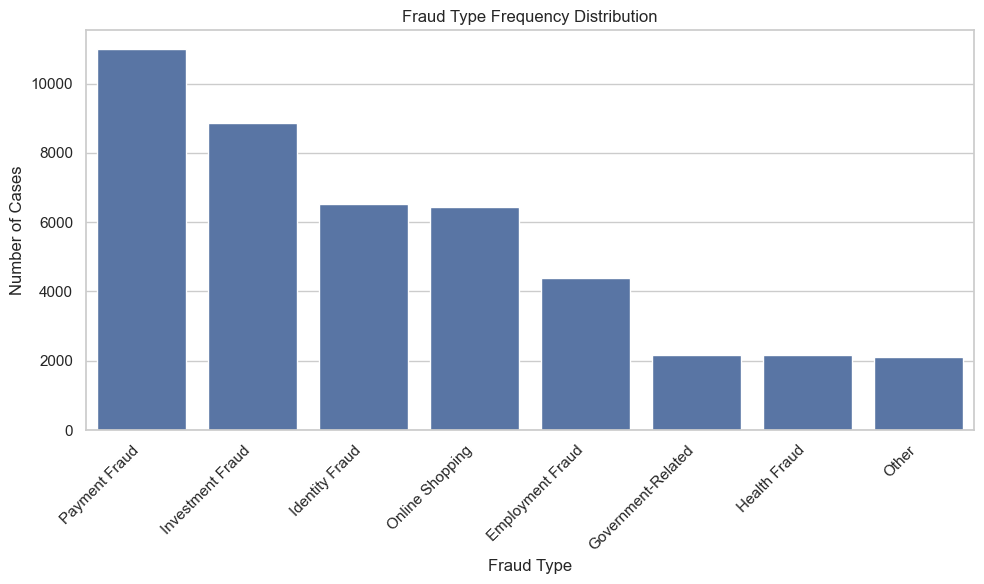

In [21]:
# TODO: Visualize the frequency of each fraud type
plt.figure(figsize=(10, 6))
fraud_counts = df['fraud_type'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Fraud Type Frequency Distribution')
plt.ylabel('Number of Cases')
plt.xlabel('Fraud Type')
plt.tight_layout()
plt.show()

### Fraud Type Distribution

The fraud type analysis shows that **Payment Fraud** is the most frequent, accounting for **25.15%** of all fraud cases.

The top four fraud types:
- Payment Fraud (25.15%)
- Investment Fraud (20.26%)
- Identity Fraud (14.96%)
- Online Shopping (14.75%)

Together, these account for approximately **75%** of all cases, indicating a strong skew toward a small number of fraud categories.  
This validates our decision to **prioritize Payment Fraud** in the TBP problem breakdown and countermeasure planning.


## Detection Stage Analysis

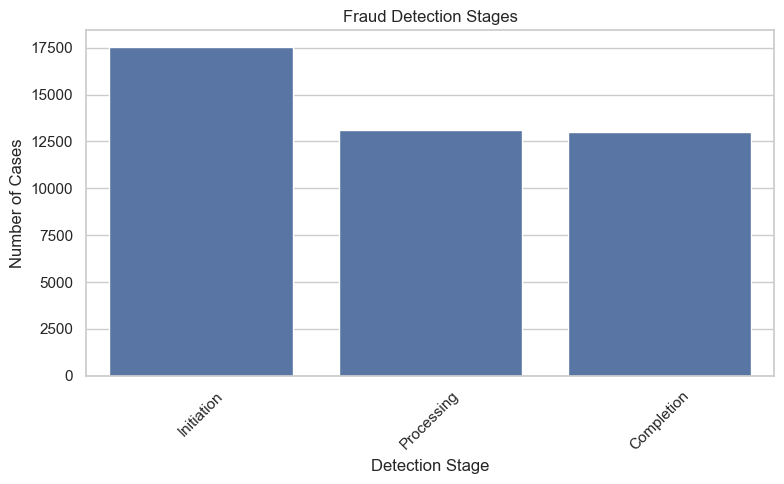

In [22]:
# TODO: Visualize fraud detection stages
plt.figure(figsize=(8, 5))
stage_counts = df['fraud_detected_at'].value_counts()
sns.barplot(x=stage_counts.index, y=stage_counts.values)
plt.title('Fraud Detection Stages')
plt.ylabel('Number of Cases')
plt.xlabel('Detection Stage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Fraud Detection Stage Distribution

Among the three detection stages:

- **Initiation** has the highest number of total fraud cases (~17,500 out of 43,680).
- Processing and Completion stages have similar case volumes but fewer preventable outcomes.

The Initiation stage is therefore identified as the **primary point of occurrence**, as it contains the largest opportunity for early intervention.


## Preventable Fraud by Detection Stage

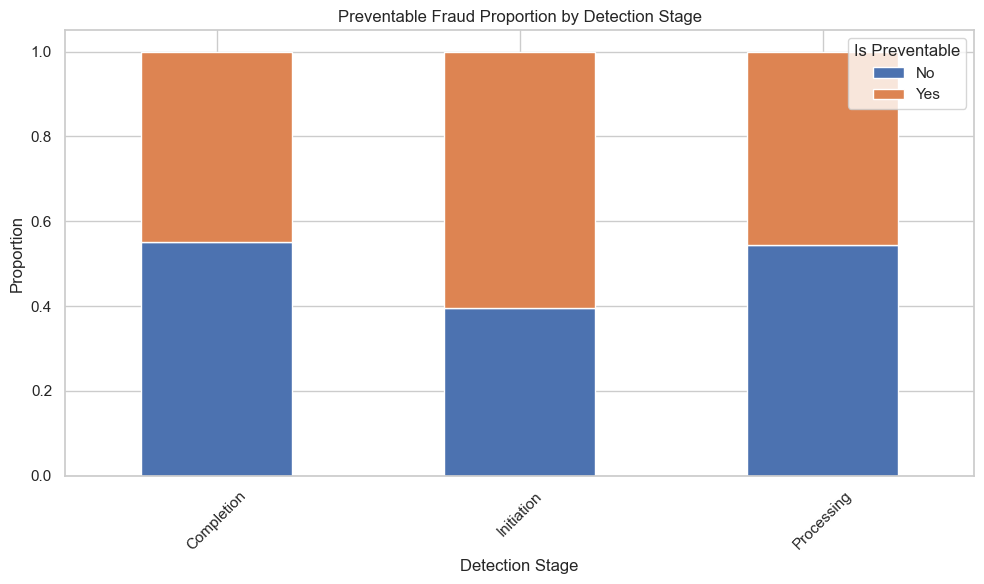

In [23]:
# TODO: Cross-tab of fraud detection stage vs preventability
preventable_ct = pd.crosstab(df['fraud_detected_at'], df['is_preventable'])
preventable_ct_percent = preventable_ct.div(preventable_ct.sum(axis=1), axis=0)

preventable_ct_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Preventable Fraud Proportion by Detection Stage')
plt.ylabel('Proportion')
plt.xlabel('Detection Stage')
plt.legend(title='Is Preventable', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Preventability by Detection Stage

Preventable fraud proportions across stages:

- **Initiation**: ~60% preventable
- Processing: ~45% preventable
- Completion: ~45% preventable

This pattern demonstrates that **fraud caught at the initiation stage is significantly more likely to be preventable**, supporting its selection as the most strategic stage for real-time fraud detection systems.


## Pareto Analysis of Fraud Types

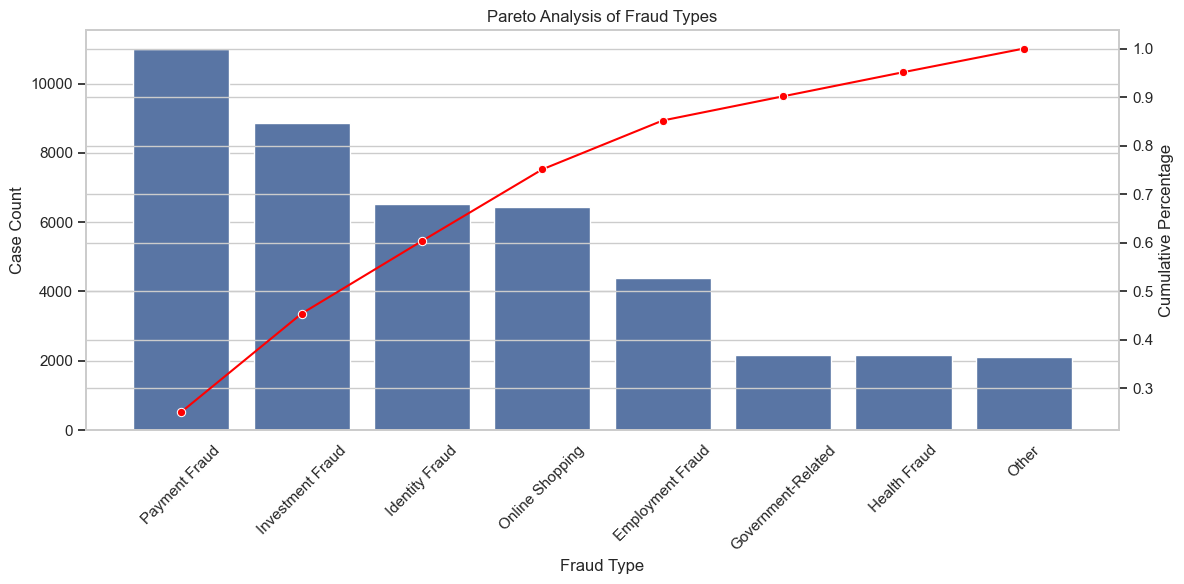

In [26]:
# TODO: Create Pareto chart to identify major contributors

# Get value counts and compute cumulative percentage
fraud_counts = df['fraud_type'].value_counts()
cumulative = fraud_counts.cumsum() / fraud_counts.sum()

# Convert to DataFrame for seaborn
pareto_df = pd.DataFrame({
    'Fraud Type': fraud_counts.index,
    'Count': fraud_counts.values,
    'Cumulative %': cumulative.values
})

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot (left Y-axis)
sns.barplot(data=pareto_df, x='Fraud Type', y='Count', ax=ax1)
ax1.set_ylabel('Case Count')
ax1.set_xlabel('Fraud Type')
plt.xticks(rotation=45)

# Line plot (right Y-axis)
ax2 = ax1.twinx()
sns.lineplot(data=pareto_df, x='Fraud Type', y='Cumulative %', marker='o', ax=ax2, color='red')
ax2.set_ylabel('Cumulative Percentage')

plt.title('Pareto Analysis of Fraud Types')
plt.tight_layout()
plt.show()


### Pareto Analysis of Fraud Types

The Pareto chart confirms the 80/20 principle:

- ~75% of fraud cases are caused by the top four types.
- This concentration suggests that targeting these specific fraud types (especially Payment and Investment Fraud) can significantly reduce overall case volume.

It reinforces the effectiveness of a **targeted fraud prevention strategy**, rather than treating all fraud types equally.


## Fraud Type Summary Table

In [27]:
# TODO: Breakdown of fraud types with % of total
fraud_summary = df['fraud_type'].value_counts().reset_index()
fraud_summary.columns = ['Fraud Type', 'Case Count']
fraud_summary['Percentage'] = (fraud_summary['Case Count'] / fraud_summary['Case Count'].sum() * 100).round(2)
fraud_summary

,Fraud Type,Case Count,Percentage
0,Payment Fraud,10984,25.15
1,Investment Fraud,8851,20.26
2,Identity Fraud,6536,14.96
3,Online Shopping,6443,14.75
4,Employment Fraud,4394,10.06
5,Government-Related,2176,4.98
6,Health Fraud,2173,4.97
7,Other,2123,4.86


### Fraud Summary Table

This table provides a breakdown of fraud case counts and their percentages by type.

It can be used in the TBP appendix or as evidence in the paper to support the argument that focusing on Payment Fraud has the greatest potential impact on reducing total fraud volume.


## **Chi-Square Test for Independence**

In [28]:
# TODO: Perform Chi-Square Test of Independence between detection stage and preventability

import scipy.stats as stats
import pandas as pd

# Create a contingency table
contingency_table = pd.crosstab(df['fraud_detected_at'], df['is_preventable'])

print("Contingency Table:")
print(contingency_table)

# Run chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p)

# Decision Rule
alpha = 0.05
if p < alpha:
    print("\nConclusion: Reject the null hypothesis (H₀). Fraud preventability is associated with the detection stage.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H₀). No association found.")


Contingency Table:
is_preventable     False  True 
fraud_detected_at              
Completion          7159   5842
Initiation          6947  10602
Processing          7137   5993

Chi-Square Statistic: 962.4095335146015
Degrees of Freedom: 2
P-Value: 1.0361559656025194e-209

Conclusion: Reject the null hypothesis (H₀). Fraud preventability is associated with the detection stage.


## Hypothesis Test Result – Fraud Preventability vs Detection Stage

We conducted a **Chi-Square Test of Independence** to assess whether the stage at which fraud is detected is associated with its preventability.

### Contingency Table:

| Detection Stage | Not Preventable | Preventable |
|------------------|------------------|---------------|
| Completion       | 7,159            | 5,842         |
| Initiation       | 6,947            | 10,602        |
| Processing       | 7,137            | 5,993         |

### Test Output:
- **Chi-Square Statistic**: 962.41  
- **Degrees of Freedom**: 2  
- **P-Value**: 1.04e-209

### Interpretation:
Since the p-value is significantly less than 0.05, we **reject the null hypothesis**.  
This confirms a **statistically significant association** between the fraud detection stage and whether the fraud is preventable.

### Conclusion:
The **Initiation stage** has the highest number of preventable fraud cases.  
This validates our targeted intervention strategy: **implementing real-time fraud detection at the transaction initiation stage** will have the greatest impact on reducing preventable frauds.


### Step 1 – Problem Clarification
- **Current situation**: 43,680 total annual fraud cases in Ontario.
- **Ideal situation**: 7,334 cases per year.
- **Gap**: 43,680 - 7,334 = 36,346 fraud cases to eliminate.

This dataset simulates exactly 43,680 cases to reflect this situation for analysis.

### Step 2 – Problem Breakdown
- Payment Fraud is the most common type (~25%).
- Initiation is the most frequent stage for fraud detection.

### Step 3 – Target Justification
- The focus is on reducing cases at the initiation stage, where fraud is most frequent and most preventable.

### Step 4 – Root Cause Confirmation
- The Chi-Square test shows a strong relationship between detection stage and preventability.
- Initiation stage offers the best opportunity for real-time AI-based fraud detection systems to reduce cases effectively.